In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from ape import chain, networks

In [3]:
# SEE: https://gist.github.com/banteg/dcf6082ff7fc6ad51ce220146f29d9ff
networks.parse_network_choice('ethereum:mainnet:alchemy').__enter__()

<alchemy chain_id=1>

In [6]:
FILENAME = "./data/blocks_18613329_18829329_50.csv"
step = 50

In [8]:
df = pd.read_csv(FILENAME)
df

,base_fee,difficulty,gas_limit,gas_used,hash,num_transactions,number,parent_hash,size,timestamp,total_difficulty
0,21906158812,0,30000000,29984800,b'\x81\xbdd@}\xf2&\xaf\xe9\x00y\x8b\xa3\xc6B\x...,369,18613329,b'\xe8\xec*6s\xea\xd1\xd9\xc9\x97\xe0\x88\x8b@...,240977,1700487263,58750003716598352816469
1,27643132205,0,30000000,14775482,b'E;\xfcQ\xa6$\\\x1eh7\x8d\x94\x08\xac\xcfE\xd...,124,18613379,b'\xfd1W\xc6~F\r\x1fQ\x00\x17R\xa4s\x83\x10\x0...,128002,1700487875,58750003716598352816469
2,27710169280,0,30000000,10790788,b'\xd1\xe4S\xc3\x1cJ\xdf\xe8j\xb7&\xb6\ru\x86\...,137,18613429,b'\x9a\xa6Z@\x1a6i\x9d\xea\x85)!\x11\xd7)A\xe6...,80965,1700488487,58750003716598352816469
3,31041904230,0,30000000,14433477,b'XZ\x99\xe4\x1fDpS\xfc\x08\x0b\xb0\xfbQ\x06]\...,156,18613479,b'\x05PA.ozY\xc1w\x088>\x00\xf4\x9e@\x8e\x8d\x...,142038,1700489087,58750003716598352816469
4,34828180467,0,30000000,17358964,b'\x7f\xac\x88\x808 B\xd6<.Vn\x8fJ\xe2D\xf3\xc...,201,18613529,b'\xfb~\xdfq\xd1\xb2=\xe0/\xfa+\xc2\xdeL.\xe2X...,149380,1700489711,58750003716598352816469
...,...,...,...,...,...,...,...,...,...,...,...
4315,57214396399,0,30000000,12535259,b'\x88\xc5V\x9d{\xae\x0f\xdf\xa7\xacB\xb6\xe51...,141,18829079,"b'\x91J\x89\x0c?\xfb\xc9\xc8""\x15\x86^\xe2\x95...",75111,1703099075,58750003716598352816469
4316,56521316854,0,30000000,8966663,b'\x18\xc8&fdK\xa8\xb9\xef\xa8\xb0\xeb\xae\xf6...,125,18829129,b'\xc0\xb6\xcar\x15\x93\xd8\xa7\x18\x1aC\x00\x...,56162,1703099687,58750003716598352816469
4317,52911135493,0,30000000,10323736,b'RU\xcb?\x9a696\xbf\xea\xc4\x7f!\r\x1c\xe8\xc...,139,18829179,b'X\xf2\x86\xa3b\xa6\x10-\x19?\x16\x8e\xa6\xbf...,82891,1703100287,58750003716598352816469
4318,54309170262,0,30000000,11620933,b';\xb0\xab\x0e\x82\xd3a\x191\x18\xf9\x0b\x14H...,133,18829229,"b""\xa3\xebq\xd0\xadn\x04\xf7\x92\xf9\x8a\x02\x...",54112,1703100899,58750003716598352816469


In [11]:
# base fee in gwei
df['base_fee_gwei'] = df['base_fee'] / 1e9
df['base_fee_gwei']

0       21.906159
1       27.643132
2       27.710169
3       31.041904
4       34.828180
          ...    
4315    57.214396
4316    56.521317
4317    52.911135
4318    54.309170
4319    53.686892
Name: base_fee_gwei, Length: 4320, dtype: float64

In [15]:
# log base fee diffs in gwei for 50 block (~10min) steps
df['dlog_base_fee_gwei'] = np.log(df['base_fee_gwei']).diff()
df['dlog_base_fee_gwei']

0            NaN
1       0.232609
2       0.002422
3       0.113539
4       0.115089
          ...   
4315    0.128057
4316   -0.012188
4317   -0.066004
4318    0.026079
4319   -0.011524
Name: dlog_base_fee_gwei, Length: 4320, dtype: float64

In [16]:
df

,base_fee,difficulty,gas_limit,gas_used,hash,num_transactions,number,parent_hash,size,timestamp,total_difficulty,base_fee_gwei,dlog_base_fee_gwei
0,21906158812,0,30000000,29984800,b'\x81\xbdd@}\xf2&\xaf\xe9\x00y\x8b\xa3\xc6B\x...,369,18613329,b'\xe8\xec*6s\xea\xd1\xd9\xc9\x97\xe0\x88\x8b@...,240977,1700487263,58750003716598352816469,21.906159,NaN
1,27643132205,0,30000000,14775482,b'E;\xfcQ\xa6$\\\x1eh7\x8d\x94\x08\xac\xcfE\xd...,124,18613379,b'\xfd1W\xc6~F\r\x1fQ\x00\x17R\xa4s\x83\x10\x0...,128002,1700487875,58750003716598352816469,27.643132,0.232609
2,27710169280,0,30000000,10790788,b'\xd1\xe4S\xc3\x1cJ\xdf\xe8j\xb7&\xb6\ru\x86\...,137,18613429,b'\x9a\xa6Z@\x1a6i\x9d\xea\x85)!\x11\xd7)A\xe6...,80965,1700488487,58750003716598352816469,27.710169,0.002422
3,31041904230,0,30000000,14433477,b'XZ\x99\xe4\x1fDpS\xfc\x08\x0b\xb0\xfbQ\x06]\...,156,18613479,b'\x05PA.ozY\xc1w\x088>\x00\xf4\x9e@\x8e\x8d\x...,142038,1700489087,58750003716598352816469,31.041904,0.113539
4,34828180467,0,30000000,17358964,b'\x7f\xac\x88\x808 B\xd6<.Vn\x8fJ\xe2D\xf3\xc...,201,18613529,b'\xfb~\xdfq\xd1\xb2=\xe0/\xfa+\xc2\xdeL.\xe2X...,149380,1700489711,58750003716598352816469,34.828180,0.115089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,57214396399,0,30000000,12535259,b'\x88\xc5V\x9d{\xae\x0f\xdf\xa7\xacB\xb6\xe51...,141,18829079,"b'\x91J\x89\x0c?\xfb\xc9\xc8""\x15\x86^\xe2\x95...",75111,1703099075,58750003716598352816469,57.214396,0.128057
4316,56521316854,0,30000000,8966663,b'\x18\xc8&fdK\xa8\xb9\xef\xa8\xb0\xeb\xae\xf6...,125,18829129,b'\xc0\xb6\xcar\x15\x93\xd8\xa7\x18\x1aC\x00\x...,56162,1703099687,58750003716598352816469,56.521317,-0.012188
4317,52911135493,0,30000000,10323736,b'RU\xcb?\x9a696\xbf\xea\xc4\x7f!\r\x1c\xe8\xc...,139,18829179,b'X\xf2\x86\xa3b\xa6\x10-\x19?\x16\x8e\xa6\xbf...,82891,1703100287,58750003716598352816469,52.911135,-0.066004
4318,54309170262,0,30000000,11620933,b';\xb0\xab\x0e\x82\xd3a\x191\x18\xf9\x0b\x14H...,133,18829229,"b""\xa3\xebq\xd0\xadn\x04\xf7\x92\xf9\x8a\x02\x...",54112,1703100899,58750003716598352816469,54.309170,0.026079


In [26]:
df.describe()

,base_fee,difficulty,gas_limit,gas_used,num_transactions,number,size,timestamp,base_fee_gwei,dlog_base_fee_gwei
count,4.320000e+03,4320.0,4.320000e+03,4.320000e+03,4320.000000,4.320000e+03,4.320000e+03,4.320000e+03,4320.000000,4319.000000
mean,4.185619e+10,0.0,2.999970e+07,1.511113e+07,157.595833,1.872130e+07,1.836671e+05,1.701794e+09,41.856189,0.000208
std,1.846392e+10,0.0,3.074033e+03,5.030244e+06,50.781036,6.236105e+04,1.859661e+05,7.547462e+05,18.463922,0.162255
min,1.606294e+10,0.0,2.997068e+07,0.000000e+00,0.000000,1.861333e+07,1.131000e+03,1.700487e+09,16.062942,-1.803706
25%,3.000910e+10,0.0,3.000000e+07,1.179862e+07,128.000000,1.866732e+07,7.093800e+04,1.701141e+09,30.009101,-0.086174
50%,3.838966e+10,0.0,3.000000e+07,1.409610e+07,149.000000,1.872130e+07,1.217775e+05,1.701793e+09,38.389662,-0.005682
75%,4.958389e+10,0.0,3.000000e+07,1.745437e+07,177.000000,1.877529e+07,2.117650e+05,1.702447e+09,49.583891,0.077513
max,3.170230e+11,0.0,3.002930e+07,2.999933e+07,718.000000,1.882928e+07,1.886800e+06,1.703101e+09,317.023014,1.916531


<Axes: ylabel='Frequency'>

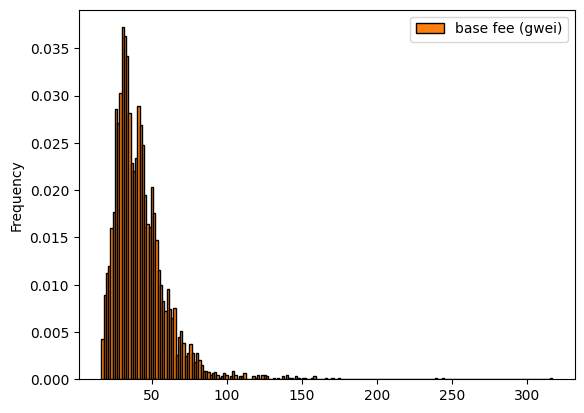

In [42]:
# concentration around 50 gwei over past month
df.plot(y='base_fee_gwei', kind='hist', bins=200, density=True, label='base fee (gwei)', color='C1', edgecolor='k')

<Axes: ylabel='Frequency'>

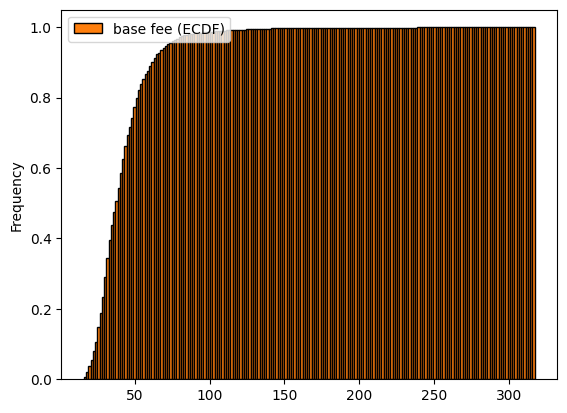

In [94]:
df.plot(y='base_fee_gwei', kind='hist', cumulative=True, bins=200, density=True, label='base fee (ECDF)', color='C1', edgecolor='k')

In [98]:
# what's the X% empirical quantile over last month with 50 block (~ 10 min) candles?
ecdf_res = stats.ecdf(df['base_fee_gwei'])
ecdf_base_fee_gwei = ecdf_res.cdf

In [99]:
ecdf_res

ECDFResult(cdf=EmpiricalDistributionFunction(quantiles=array([ 16.06294203,  16.37112405,  16.44280454, ..., 239.67816893,
       243.91769361, 317.02301447]), probabilities=array([2.31481481e-04, 4.62962963e-04, 6.94444444e-04, ...,
       9.99537037e-01, 9.99768519e-01, 1.00000000e+00])), sf=EmpiricalDistributionFunction(quantiles=array([ 16.06294203,  16.37112405,  16.44280454, ..., 239.67816893,
       243.91769361, 317.02301447]), probabilities=array([9.99768519e-01, 9.99537037e-01, 9.99305556e-01, ...,
       4.62962963e-04, 2.31481481e-04, 0.00000000e+00])))

In [109]:
# ... empirical quantiles over last month for range of base fee prices with 50 block (~ 10 min) candles
base_fees = np.arange(40, 201, 20)
base_fees

array([ 40,  60,  80, 100, 120, 140, 160, 180, 200])

In [110]:
ecdf_base_fee_gwei.evaluate(base_fees)

array([0.53680556, 0.87847222, 0.97106481, 0.98703704, 0.99212963,
       0.99583333, 0.99861111, 0.99930556, 0.99930556])

In [ ]:
# ... about 53.7% chance of being below the mean base fee
# ... about 97.1% chance of being below 2x mean base fee
# ... about 99.2% chance of being below 3x mean base fee
# ... about 99.9% cahnce of being below 4x mean base fee

<Axes: xlabel='number', ylabel='dlog_base_fee_gwei'>

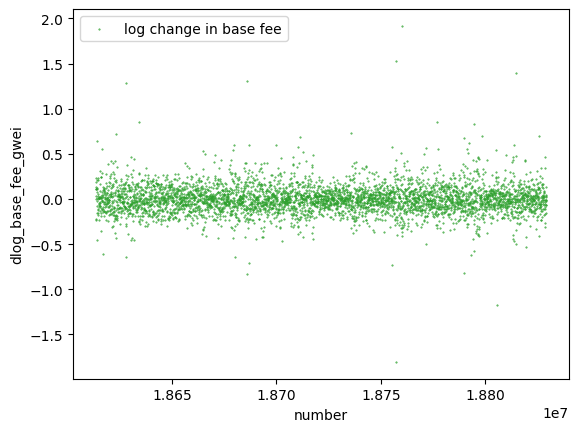

In [32]:
df.plot(x='number', y='dlog_base_fee_gwei', kind='scatter', s=0.2, label='log change in base fee', color='C2')

<Axes: ylabel='Frequency'>

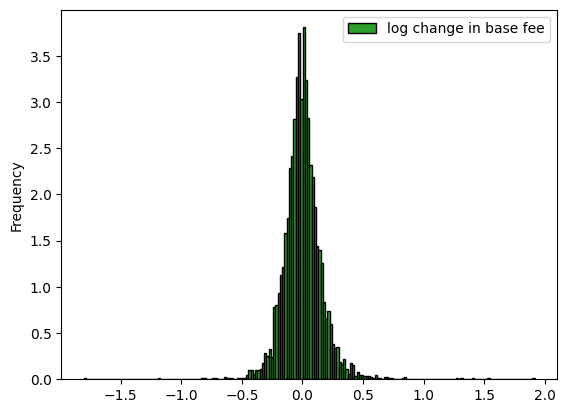

In [41]:
# looks pretty bell curve: i.e. ~ GBM for base fee
df.plot(y='dlog_base_fee_gwei', kind='hist', bins=200, density=True, label='log change in base fee', color='C2', edgecolor='k')

<Axes: ylabel='Frequency'>

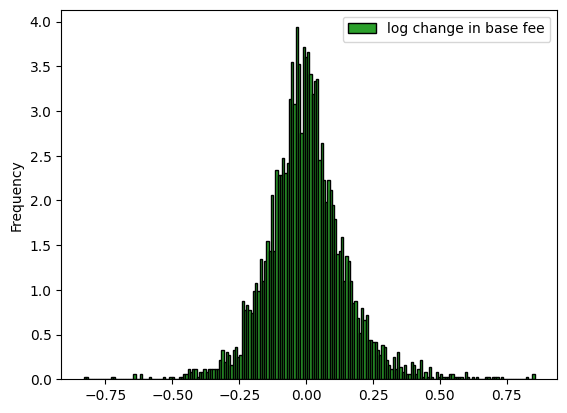

In [40]:
# ignoring extreme outliers beyond +/- 1 even more so ...
df[np.abs(df['dlog_base_fee_gwei']) < 1.0].plot(y='dlog_base_fee_gwei', kind='hist', bins=200, density=True, label='log change in base fee', color='C2', edgecolor='k', )

In [59]:
# function to fit log price diffs to a few distributions
# SEE: https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python
def plot_fit_hist(df_data: pd.DataFrame, col: str, dists: list) -> dict:
    """
    Plots fits on top of histogram data. Returns fits for all dist names
    """
    params_data = {}

    df_data_col_notnull = df_data[df_data[col].notnull()][col]
    x = np.arange(-1.5, 1.5, 0.01)
    x_lim_max = 1.5
    ax = df_data.plot(y=col, kind='hist', bins=200, color='w', edgecolor='black', density=True, xlim=(-x_lim_max, x_lim_max))
    for dist in dists:
        params = getattr(stats, dist).fit(df_data_col_notnull)
        arg = params[:-2]
        pdf = getattr(stats, dist).pdf(x, *arg, loc=params[-2], scale=params[-1])
        df_pdf = pd.DataFrame(data={dist: pdf}, index=x)
        df_pdf.plot(ax=ax)
    
        # store param fits for later use in cell below
        params_data[dist] = [*params] + [None for _ in range(4 - len(params))]
    
    return params_data

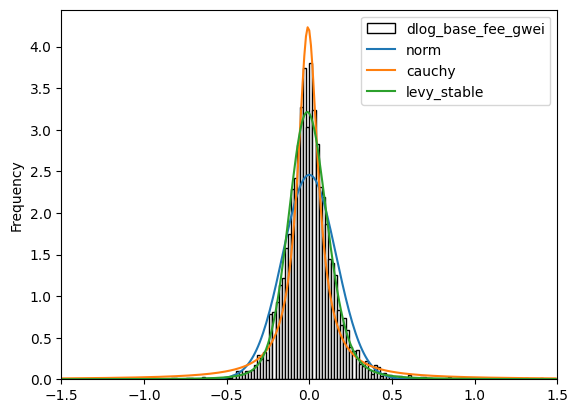

In [60]:
%%capture --no-display

# how good of a fit do we have to log normal for 50 block "candles"?
params_data = plot_fit_hist(df, 'dlog_base_fee_gwei', ['norm', 'cauchy', 'levy_stable'])

In [67]:
# 50 block "candle" distr fits ...
df_params = pd.DataFrame(data=params_data).T
df_params

,0,1,2,3
norm,0.000208,0.162236,NaN,NaN
cauchy,-0.007547,0.075118,NaN,NaN
levy_stable,1.712342,0.267022,0.001523,0.088217


In [64]:
# function to calculate z_alpha quantile at time t assuming GBM
#  ... i.e. P[base_fee_t/base_fee_0 <= z_alpha] = 1-alpha
def q_base_fee_gbm(t: float, alpha: float, mu: float, sigma: float) -> float:
    # t is in number of candles mu, sigma normalized to
    return np.exp(mu * t + sigma * np.sqrt(t) * stats.norm.ppf(1-alpha))

In [93]:
# 1085 "candles" later (~ 1 week later), 1-alpha = 60% quantile is about 5x current base fee ...
mu = df_params.iloc[0][0]
sigma = df_params.iloc[0][1]
q_base_fee_gbm(1085, 0.4, mu, sigma)

4.8504288190875915

In [111]:
# ... likely not exactly GBM since tend to return to a "normal" base fee